# Predicting Cancellations for Future Reservations

This notebooks makes use of the `generate_hotel_dfs` and `model_cancellations` functions found in `utils.py`.

In [1]:
from utils import generate_hotel_dfs, model_cancellations
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [3]:
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv")

In [4]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [5]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

Training sample size: 38295
Testing sample Size: 1765




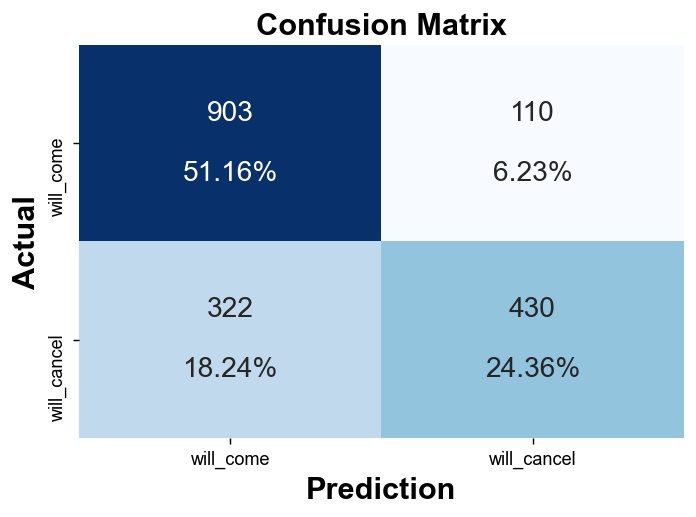

Optimal probability threshold (to maximize F-0.5): 0.598
F-0.5 Score: 0.738



In [6]:
h1_futures = model_cancellations(h1_res, "2017-08-01", 1)


In [7]:
h1_futures.will_cancel.value_counts()

Series([], Name: will_cancel, dtype: int64)

In [8]:
h1_futures.shape

(1765, 48)

In [9]:
mask = h1_futures.will_cancel.isna()
h1_futures[mask].head(3)

,LeadTime,LOS,StaysInWeekendNights,StaysInWeekNights,ADR,NumPeople,Adults,Children,Babies,TotalOfSpecialRequests,PreviousBookings,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,IsRepeatedGuest,AgencyBooking,CompanyListed,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,MEAL_Undefined,MEAL_HB,MEAL_FB,will_cancel
12815,240,16,5,11,183.05,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,False,False,False,False,False,False,False,False,False,False,True,0,0,0,1,0,NaN
12816,236,16,5,11,182.92,2,2,0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,1,0,1,0,True,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,NaN
12859,202,14,4,10,158.63,3,2,1,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,1,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,NaN


Training sample size: 76320
Testing sample Size: 3010




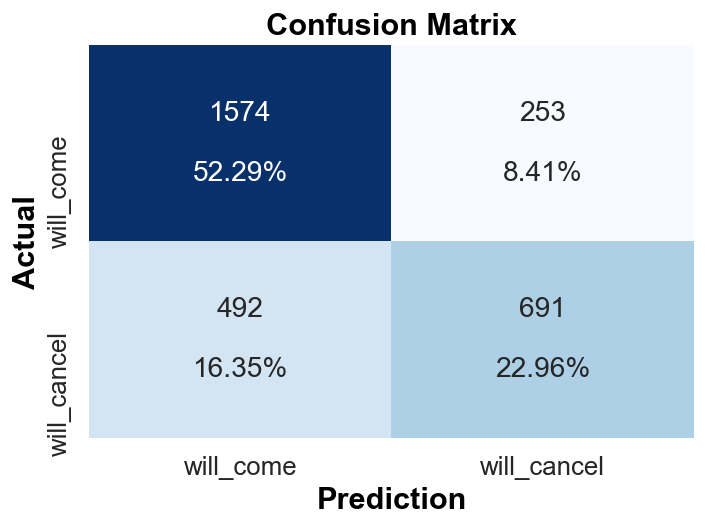

Optimal probability threshold (to maximize F-0.5): 0.574
F-0.5 Score: 0.697



In [10]:
h2_futures = model_cancellations(h2_res, "2017-08-01", 2)


In [11]:
h2_futures.head(3)

,LeadTime,LOS,StaysInWeekendNights,StaysInWeekNights,ADR,NumPeople,Adults,Children,Babies,TotalOfSpecialRequests,PreviousBookings,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,IsRepeatedGuest,AgencyBooking,CompanyListed,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,MS_Undefined,DC_Direct,DC_GDS,DC_TA/TO,DC_Undefined,FROM_PRT,FROM_FRA,FROM_DEU,FROM_GBR,FROM_ESP,FROM_ITA,FROM_BEL,FROM_BRA,FROM_USA,FROM_NLD,FROM_other,DT_NonRefundable,DT_Refundable,MEAL_FB,MEAL_HB,MEAL_SC,will_cancel
32198,192,9,3,6,166.5,2.0,2,0.0,0,1,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,0,0,0,1,0,NaN
32199,253,11,3,8,125.1,3.0,2,1.0,0,2,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0,NaN
32200,242,13,3,10,156.6,3.0,3,0.0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,0,0,0,0,0,NaN


In [12]:
h2_futures.will_cancel.value_counts()

Series([], Name: will_cancel, dtype: int64)

In [13]:
h2_futures.head(3)

,LeadTime,LOS,StaysInWeekendNights,StaysInWeekNights,ADR,NumPeople,Adults,Children,Babies,TotalOfSpecialRequests,PreviousBookings,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,IsRepeatedGuest,AgencyBooking,CompanyListed,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,MS_Undefined,DC_Direct,DC_GDS,DC_TA/TO,DC_Undefined,FROM_PRT,FROM_FRA,FROM_DEU,FROM_GBR,FROM_ESP,FROM_ITA,FROM_BEL,FROM_BRA,FROM_USA,FROM_NLD,FROM_other,DT_NonRefundable,DT_Refundable,MEAL_FB,MEAL_HB,MEAL_SC,will_cancel
32198,192,9,3,6,166.5,2.0,2,0.0,0,1,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,0,0,0,1,0,NaN
32199,253,11,3,8,125.1,3.0,2,1.0,0,2,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0,NaN
32200,242,13,3,10,156.6,3.0,3,0.0,0,0,0,0,0,0,0,0,0,True,False,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,False,False,False,False,False,False,True,False,False,False,False,0,0,0,0,0,NaN


In [14]:
h1_futures.to_pickle("pickle/h1_futures.pick")
h2_futures.to_pickle("pickle/h2_futures.pick")